In [ ]:
# Customer Churn Prediction Using ANN.

import pandas as pd  # Importing pandas for data manipulation and analysis.
dataset=pd.read_csv("C:\Project\Churn_Modelling.csv")   # Reading the dataset from a CSV file.
dataset.head(5) 

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_2704\3273337222.py:4: SyntaxWarning: invalid escape sequence '\P'
  dataset=pd.read_csv("C:\Project\Churn_Modelling.csv")


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.isnull().sum() # Finding null values in the dataset

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
input_data=dataset.iloc[:,:-1]  # Selecting all columns except the last one
output_data=dataset.iloc[:,-1]  # Selecting the last column

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()   # Feature Scaling
ss.fit_transform(input_data)   # Transforming the input data

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)  # Converting the transformed data back to DataFrame.

In [ ]:
import tensorflow 
from keras.layers import Dense  # Importing Dense layer from Keras
from keras.models import Sequential  # Importing Sequential model from Keras
from keras.callbacks import EarlyStopping # EarlyStopping to prevent overfitting
from keras.regularizers import l2 # Importing L2 regularization to prevent overfitting
from keras.models import Sequential # Importing Sequential model from Keras

In [ ]:
ann=Sequential()
# Adding the first hidden layer with 6 neurons, input dimension of 8, ReLU activation function, and L2 regularization.
ann.add(Dense(6,input_dim=8,activation='relu',kernel_regularizer=l2(0.01))) 

# Adding additional hidden layers with 4 and 2 neurons respectively, using ReLU activation function and L2 regularization.
ann.add(Dense(4,activation='relu',kernel_regularizer=l2(0.01)))

# Adding the output layer with 1 neuron, using sigmoid activation function for binary classification.
ann.add(Dense(2,activation='relu',kernel_regularizer=l2(0.01)))

# Adding the output layer with 1 neuron, using sigmoid activation function for binary classification.
ann.add(Dense(1,activation='sigmoid'))

c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the ANN model with Adam optimizer, binary crossentropy loss function, and accuracy as a metric.
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [ ]:
from sklearn.model_selection import train_test_split # Splitting the dataset into training and testing sets

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42) # Splitting the dataset into training and testing sets

In [ ]:
ann.fit(x_train,y_train,epochs=50,batch_size=100) # Training the ANN model for 50 epochs with a batch size of 100

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6162 - loss: 0.8490
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.7500
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.6520
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7897 - loss: 0.5863
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.5549
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7968 - loss: 0.5195
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.5046
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4991
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.4899
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7932 - loss: 0.4786
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.4770
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7944 - lo

In [ ]:
from sklearn.metrics import accuracy_score # Evaluating the model's accuracy

In [ ]:
prd=ann.predict(x_test)  # Predicting the output for the test set
prd_data=[]
for i in prd:  # Iterating through the predictions
    print(i[0])
    if i[0]>0.5:  
        prd_data.append(1)
    else:
        prd_data.append(0)  


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.07733484
0.070008755
0.14971423
0.24172421
0.06618922
0.032088183
0.19064705
0.0708879
0.34776077
0.26608425
0.6623332
0.6623332
0.5308158
0.35945
0.031461135
0.13557288
0.13597725
0.17416762
0.06897252
0.08102143
0.19314367
0.026200537
0.13034205
0.270185
0.114614986
0.33999547
0.12443477
0.052558787
0.023068909
0.20935339
0.07356234
0.064695336
0.14867058
0.07957453
0.20909294
0.6623332
0.25374722
0.034550477
0.27116427
0.034229044
0.28612906
0.49862057
0.037761163
0.15176696
0.39602953
0.09538399
0.065429784
0.19411199
0.18456993
0.1137021
0.09905465
0.30728522
0.47593567
0.2363905
0.6623332
0.33081043
0.022038672
0.1414634
0.2763637
0.07289938
0.08250087
0.028962769
0.25296068
0.13571094
0.10660298
0.2103966
0.034491993
0.33984494
0.3668039
0.12315542
0.100468054
0.21708873
0.48665732
0.107490346
0.10276141
0.15662202
0.015350725
0.07721735
0.19284216
0.16472866
0.026464673
0.35950747
0.22661163
0.2677012
0.3723139
0.58005375
0.35653022
0.47

In [ ]:
accuracy_score(y_test,prd_data)*100 # Evaluating the accuracy of the model on the test set.

85.45

In [103]:
prd1=ann.predict(x_train)  # Predicting the output for the training set
prd_data1=[]
for i in prd1: # Iterating through the predictions
    print(i[0])
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0) 

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.024610186
0.13076761
0.08728754
0.11268887
0.6623332
0.38348058
0.11121378
0.061348073
0.036773525
0.12413033
0.25951362
0.09603939
0.098918185
0.046254676
0.05800781
0.024882969
0.23603536
0.35882545
0.54308367
0.07472891
0.07659009
0.03019377
0.10611256
0.2461067
0.14151533
0.12988918
0.11698689
0.17645764
0.37271047
0.1705541
0.14939661
0.6623332
0.14586072
0.09839972
0.011582641
0.06786774
0.15955359
0.3778286
0.3481873
0.027726492
0.17421363
0.2801783
0.33785895
0.050040238
0.49141103
0.030876944
0.14479965
0.4251414
0.12518542
0.03321614
0.05295453
0.063973285
0.12564656
0.3322559
0.32946467
0.22435778
0.11564282
0.28621894
0.3558819
0.03636022
0.06131524
0.11477251
0.31910935
0.20161664
0.6623332
0.09262652
0.11899918
0.15434471
0.18414019
0.21571313
0.21706435
0.024072628
0.054859605
0.6623332
0.6623332
0.5202466
0.29176152
0.06254517
0.59573406
0.05321186
0.550014
0.050391585
0.02977966
0.6623332
0.14825746
0.05373388
0.029437903
0.03

In [104]:
accuracy_score(y_train,prd_data1)*100   # Evaluating the accuracy of the model on the training set.

85.3375

In [ ]:
# Training the ANN model with validation data to monitor performance on unseen data

ann.fit(x_train,y_train,epochs=50,batch_size=100,validation_data=(x_test,y_test),callbacks=EarlyStopping())  

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8532 - loss: 0.4161 - val_accuracy: 0.8550 - val_loss: 0.4094
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8554 - loss: 0.4147 - val_accuracy: 0.8570 - val_loss: 0.4085
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8541 - loss: 0.4143 - val_accuracy: 0.8555 - val_loss: 0.4077
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8539 - loss: 0.4127 - val_accuracy: 0.8560 - val_loss: 0.4081


In [ ]:
ann.history.history  # Plotting the training and validation loss over epochs

{'accuracy': [0.8514999747276306,
  0.8514999747276306,
  0.8541250228881836,
  0.8525000214576721],
 'loss': [0.4175386130809784,
  0.4172729551792145,
  0.4163459837436676,
  0.415995717048645],
 'val_accuracy': [0.8550000190734863,
  0.8569999933242798,
  0.8554999828338623,
  0.8560000061988831],
 'val_loss': [0.4094443619251251,
  0.4085017442703247,
  0.4077039361000061,
  0.40806013345718384]}

In [ ]:
train_accuarcy=ann.history.history['accuracy']   # Training accuracy over epochs
test_accuarcy=ann.history.history['val_accuracy']   # Validation accuracy over epochs

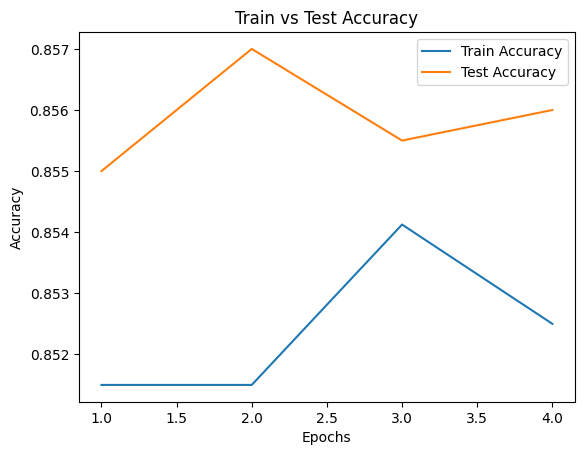

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs.
plt.plot([i for i in range(1,5)],train_accuarcy,label='Train Accuracy')   # Plotting training accuracy
plt.title('Train vs Test Accuracy')
plt.plot([i for i in range(1,5)],test_accuarcy,label='Test Accuracy')  # Plotting validation accuracy
plt.xlabel('Epochs')   
plt.ylabel('Accuracy')
plt.legend()
plt.show()